<a href="https://colab.research.google.com/github/gaciuki2402/Seizure_classification/blob/main/Seizure_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [221]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading dependancies

In [222]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

Loading CSV file

In [223]:
csv_file_path = "/content/drive/MyDrive/CSV/Epileptic Seizure Recognition.csv"

# loading the data to a dataframe
dataframe = pd.read_csv(csv_file_path)

In [224]:
# printing the first five rows of the dataframe
dataframe.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [225]:
# printing the last five rows of the data frame
dataframe.tail()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,3
11499,X16.V1.210,29,41,57,72,74,62,54,43,31,...,-59,-25,-4,2,5,4,-2,2,20,4


In [226]:
# number of rows amd columns in the dataset
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [227]:
# checking for any missing values
dataframe.isnull().sum()

Unnamed    0
X1         0
X2         0
X3         0
X4         0
          ..
X175       0
X176       0
X177       0
X178       0
y          0
Length: 180, dtype: int64

In [228]:
# statistical measure about the data
dataframe.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


In [229]:
# checking the distribution of target variables
dataframe['y'].value_counts()

4    2300
1    2300
5    2300
2    2300
3    2300
Name: y, dtype: int64

1 - Recording of seizure activity.

2 - They recorded the EEG from the area where the tuomor was located.

3- Yes they identify where they were recording the EEG signal in the brain and recording the EEG activity from the healthy brain area.

4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed.

5 - eyes open, means when thet were recording the EEG signal of the brain the patient had their eyes open.

In [230]:
print("Only subjects in class 1 have epileptic seizure.")

Only subjects in class 1 have epileptic seizure.


In [231]:
# getting the mean of each labels
dataframe.groupby('y').mean()

<ipython-input-231-5bb7359a37b7>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataframe.groupby('y').mean()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
y,,,,,,,,,,,,,,,,,,,,,
1,-21.936522,-19.049130,-15.293913,-9.836087,-3.707391,2.730000,6.899565,7.425652,8.380870,10.773913,...,-7.266522,-9.714783,-15.909565,-22.383043,-26.424783,-26.221739,-25.830870,-25.043913,-24.548261,-24.016522
2,-7.710000,-8.148696,-8.020000,-8.050435,-7.776957,-8.220870,-8.597826,-9.210000,-9.217826,-9.347826,...,-7.979565,-8.483043,-8.967391,-9.067391,-8.924783,-8.592174,-8.524348,-8.558696,-8.187391,-8.147391
3,-9.207391,-9.276522,-9.968261,-10.634348,-11.172174,-11.559130,-11.797826,-12.013043,-12.132609,-12.249130,...,-13.590000,-13.332174,-13.218696,-12.789565,-12.366087,-11.320000,-10.455217,-9.757391,-9.418696,-8.935217
4,-12.726087,-12.410435,-12.272609,-12.096957,-12.083043,-12.349130,-13.064348,-13.419565,-13.441739,-13.147826,...,-13.428696,-13.636522,-14.114783,-14.404783,-14.251304,-14.109565,-13.653913,-13.082174,-12.791739,-12.914783
5,-6.326957,-5.673043,-5.380870,-5.097391,-5.309130,-5.618261,-5.950000,-6.218696,-6.378696,-6.871304,...,-5.229565,-5.562174,-5.941304,-6.072609,-6.377391,-6.573043,-6.760870,-7.083478,-7.183913,-6.964348


<Axes: >

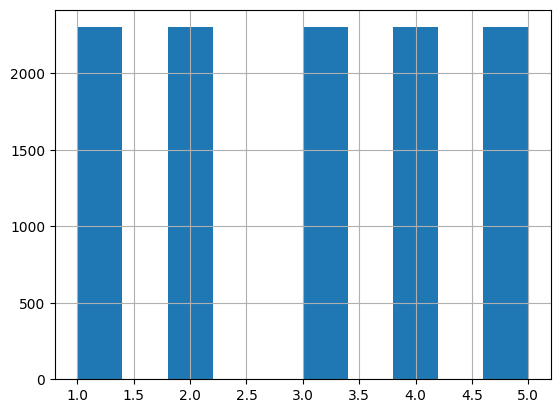

In [232]:
dataframe.y.hist()

In [233]:
dic = {5:0, 4:0, 3:0, 2:0, 1:1}
dataframe['y'] = dataframe['y'].map(dic)

In [234]:
non_seizure, seizure = dataframe['y'].value_counts()
print("The number of trials for non-seizure class:", non_seizure)
print("The number of trials for seizure class:", seizure)
dataframe.head()


The number of trials for non-seizure class: 9200
The number of trials for seizure class: 2300


,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [235]:
# dropping unneccessary features
dataframe = dataframe.drop('Unnamed', axis = 1)

In [236]:
dataframe.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,0.200000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,0.400017
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,0.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,0.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,0.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,0.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,1.000000


In [237]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 15.7 MB


In [238]:
# Extracting the features
X = dataframe.drop('y', axis = 1)
Y = dataframe['y']

In [239]:
# splitting the data into training data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)


In [240]:
print(X)

        X1   X2   X3   X4   X5   X6   X7   X8   X9  X10  ...  X169  X170  \
0      135  190  229  223  192  125   55   -9  -33  -38  ...     8   -17   
1      386  382  356  331  320  315  307  272  244  232  ...   168   164   
2      -32  -39  -47  -37  -32  -36  -57  -73  -85  -94  ...    29    57   
3     -105 -101  -96  -92  -89  -95 -102 -100  -87  -79  ...   -80   -82   
4       -9  -65  -98 -102  -78  -48  -16    0  -21  -59  ...    10     4   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
11495  -22  -22  -23  -26  -36  -42  -45  -42  -45  -49  ...    20    15   
11496  -47  -11   28   77  141  211  246  240  193  136  ...   -94   -65   
11497   14    6  -13  -16   10   26   27   -9    4   14  ...   -42   -65   
11498  -40  -25   -9  -12   -2   12    7   19   22   29  ...   114   121   
11499   29   41   57   72   74   62   54   43   31   23  ...   -94   -59   

       X171  X172  X173  X174  X175  X176  X177  X178  
0       -15   -31   -77  -103  

In [241]:
print(Y)

0        0
1        1
2        0
3        0
4        0
        ..
11495    0
11496    1
11497    0
11498    0
11499    0
Name: y, Length: 11500, dtype: int64


In [242]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((9200, 178), (2300, 178), (9200,), (2300,))

Standardize the features


In [243]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [244]:
print(X_train_std)

[[ 0.18781755  0.23857064  0.22684836 ...  0.24964422  0.22399194
   0.21569156]
 [ 0.19982526  0.14215544  0.15954122 ...  0.21890874  0.11413018
   0.05873478]
 [-0.02832123  0.00355859  0.01268926 ... -0.217535   -0.2154551
  -0.24914199]
 ...
 [ 0.14579056  0.14215544  0.12282823 ...  0.01605461  0.02257871
   0.08288198]
 [-0.6046913  -0.68942568 -0.8317095  ... -0.50644847 -0.46569577
  -0.55701877]
 [-0.33451783 -0.24953132 -0.25653933 ... -0.40194785 -0.31310999
  -0.27328919]]


In [245]:
print (X_test_std)

[[ 0.127779    0.15420734  0.15954122 ...  0.08981975  0.10192332
   0.10099237]
 [-0.01030966 -0.09285662 -0.17087569 ...  0.42176288  0.52916349
   0.57186273]
 [-0.41256794 -0.48454337 -0.48905493 ...  0.21276165  0.4131983
   0.52960513]
 ...
 [-0.38254867 -0.58698453 -0.62978806 ...  0.34799774  0.30943997
   0.19154437]
 [ 0.28988308  0.22651874  0.16566005 ...  0.08367265  0.12023361
   0.11910277]
 [ 0.22984453  0.23857064  0.10447173 ...  0.5201164   0.53526692
   0.40283235]]


Building Neural network MOdel

In [246]:
# define the keras model
nn_model= models.Sequential([
    layers.Dense(128, activation = 'relu', input_shape=(X_train_std.shape[1],)),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')

])

In [247]:
# compile the model
nn_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])
nn_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 128)               22912     
                                                                 
 dense_22 (Dense)            (None, 32)                4128      
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
Total params: 27073 (105.75 KB)
Trainable params: 27073 (105.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the Model

In [248]:
history = nn_model.fit(X_test_std, Y_train, validation_split = 0.2, epochs = 10, batch_size=32)


Epoch 1/10
58/58 [==============================] - 1s 7ms/step - loss: 0.5992 - accuracy: 0.7707 - val_loss: 0.5562 - val_accuracy: 0.8196
Epoch 2/10
58/58 [==============================] - 0s 3ms/step - loss: 0.5020 - accuracy: 0.8049 - val_loss: 0.5469 - val_accuracy: 0.8043
Epoch 3/10
58/58 [==============================] - 0s 4ms/step - loss: 0.4620 - accuracy: 0.8098 - val_loss: 0.5483 - val_accuracy: 0.8130
Epoch 4/10
58/58 [==============================] - 0s 4ms/step - loss: 0.4350 - accuracy: 0.8163 - val_loss: 0.5482 - val_accuracy: 0.8152
Epoch 5/10
58/58 [==============================] - 0s 3ms/step - loss: 0.4122 - accuracy: 0.8250 - val_loss: 0.5592 - val_accuracy: 0.8043
Epoch 6/10
58/58 [==============================] - 0s 4ms/step - loss: 0.3976 - accuracy: 0.8310 - val_loss: 0.5758 - val_accuracy: 0.8043
Epoch 7/10
58/58 [==============================] - 0s 3ms/step - loss: 0.3864 - accuracy: 0.8326 - val_loss: 0.6135 - val_accuracy: 0.7935
Epoch 8/10
58/58 [==

In [249]:
# Build and train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_std, Y_train)

RandomForestClassifier(random_state=42)

In [250]:
# combine predictions
nn_predictions = nn_model.predict(X_test_std)
rf_predictions = rf_model.predict(X_test_std)

72/72 [==============================] - 0s 1ms/step


In [251]:
# ensemble_predictions
ensemble_predictions = (nn_predictions + rf_predictions) / 2
print(ensemble_predictions.shape)


(2300, 2300)


In [255]:
# convert probabilities to binary
ensemble_binary_predictions = (ensemble_predictions > 0.5).astype(int).ravel()
# ensure the lengths are consistent
if len(Y_test) != len(ensemble_binary_predictions):
  min_length = min(len(Y_test), len(ensemble_binary_predictions))
  Y_test = Y_test[:min_length]
  ensemble_binary_predictions = ensemble_binary_predictions[:min_length]

# evaluate ensemble performance
ensemble_accuracy = accuracy_score(Y_test, ensemble_binary_predictions)
print(f"EnsembleAccuracy: {ensemble_accuracy}")

# additional evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(Y_test, ensemble_binary_predictions))
print("Confusion Report:\n", classification_report(Y_test, ensemble_binary_predictions))
# else:
#   print("Error: Number of samples in Y_test and ensemble_binary_predictons are inconsistent.")

EnsembleAccuracy: 0.9765217391304348
Confusion Matrix:
 [[1791   19]
 [  35  455]]
Confusion Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1810
           1       0.96      0.93      0.94       490

    accuracy                           0.98      2300
   macro avg       0.97      0.96      0.96      2300
weighted avg       0.98      0.98      0.98      2300



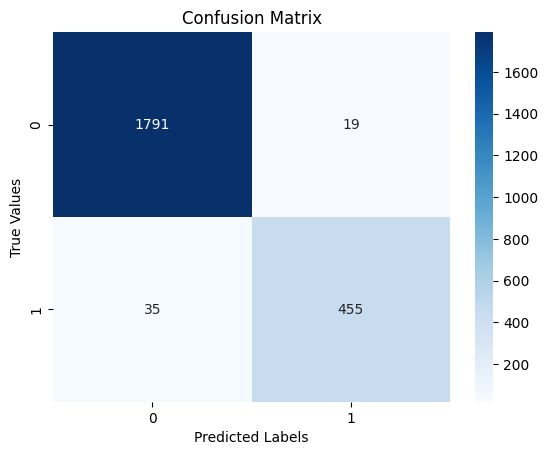

In [257]:
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(Y_test, ensemble_binary_predictions)
# plotting the confusiion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Values")
plt.show()

In [ ]:
# evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_std, Y_test)
print(f"Test Accuracy: {accuracy:.2f}")

Building Predictive System

In [ ]:
input_data = (410,451,491,541,581,641,736,757,692,435,61,-387,-823,-1107,-1188,-1110,-947,-765,-600,-471,-376,-301,-220,-136,-55,15,73,128,179,241,300,353,385,398,409,445,519,625,723,742,652,458,173,-201,-622,-971,-1139,-1122,-1013,-863,-708,-546,-399,-291,-210,-128,-58,16,86,140,189,229,264,285,306,315,331,342,372,419,475,524,574,637,707,695,561,279,-172,-623,-1018,-1202,-1215,-1079,-903,-720,-553,-430,-343,-262,-188,-106,-42,29,89,147,196,245,302,353,395,401,419,428,467,505,548,608,693,732,682,475,154,-281,-705,-1027,-1141,-1093,-935,-743,-548,-393,-282,-203,-125,-48,37,112,178,236,286,336,381,429,475,525,568,615,661,706,714,679,575,412,117,-275,-672,-957,-1044,-997,-877,-719,-544,-374,-245,-157,-94,-26,39,119,181,237,278,315,342,366,385,399,409,415,428,463,510,562,607,667,748,763)
# change the input data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape numpy array as we are predicting from one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0][0] == 1):
  print("The patient has  Seizure")
else:
  print("The patient has no seizure")